# Portfolio Data
This notebook gather the data for a portfolio. In the first case, we consider a portfolio of two equities, market portfolio (SP 500) and risk-free equity (risk-free rate).

In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
sys.path.append('../module')
from data_handler import get_monthly_date_format, get_econ_predictors, get_quarterly_date_format
%matplotlib inline

In [4]:
data_freq = 'quarterly'  

date_freq_to_data_func_map = {'monthly': ('../../data/econ_predictors_monthly_2021_Amit_Goyal.csv',
                                            get_monthly_date_format), 
                            'quarterly': ('../../data/econ_predictors_quarterly_2021_Amit_Goyal.csv',
                                        get_quarterly_date_format)}
               
data_path, date_format_func = date_freq_to_data_func_map[data_freq]
data = pd.read_csv(data_path, index_col=0)
data.index = [date_format_func(str(x), {'format':'%Y%m'}) for x in data.index]
econ_data = data
equity_price = econ_data['Index'].apply(lambda x: re.sub(r'[^\w\s|.]', '', x))
equity_price = equity_price.astype(float)
equity_return = equity_price.pct_change()
rf = econ_data['Rfree']

<AxesSubplot:>

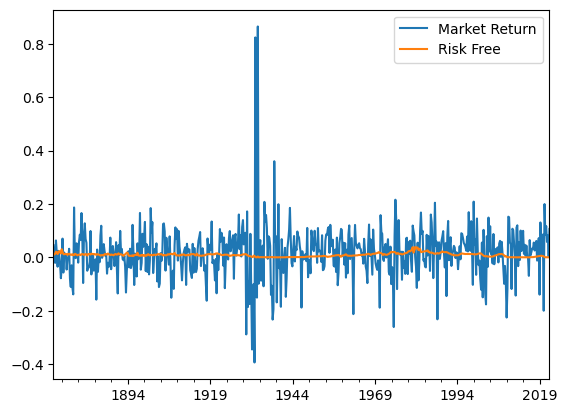

In [14]:
portfolio = pd.concat([equity_return, rf], axis=1).dropna()
portfolio.columns = ['Market Return', 'Risk Free']
portfolio.plot()

In [16]:
portfolio.to_csv('../../data/portfolio_market_rf_quarter_1871_2021.csv')